# 손글씨 분류하기

sklearn의 예제 데이터 셋인 digits를 학습하는 모델을 만들어 보자.

## 필요한 모듈 Import하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

학습시킬 모델들도 import한다

In [2]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 데이터 준비하기
sklearn에서 digits data set을 로드한다.

In [3]:
digits = load_digits()

## 데이터 이해하기

로드된 데이터를 분석해보자.  
우선 데이터 feature와 target을 확인해보자.

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

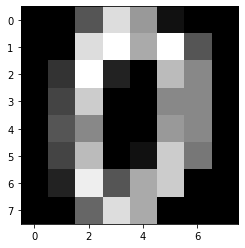

In [6]:
plt.imshow(digits.images[0], cmap="gray")

In [7]:
np.max(digits.data)

16.0

### Target Names 출력해 보기

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

이 손글씨 데이터는 8x8(64)의 0 ~ 16 범위의 픽셀 데이터와, 0 ~ 9까지 10개의 라벨로 구성되어있다.  
모두 같이 0~16까지의 작은 범위를 가져서 굳이 정규화를 안해도 될 것 같다.

### Feature Data 지정하기
cnn같이 다차원 데이터가 필요한게 아니니깐 그냥 64개의 픽셀 데이터를 그대로 사용한다.

In [9]:
x_data = digits.data
x_data.shape

(1797, 64)

### Label Data 지정하기
라벨도 0~9까지 숫자 값으로 target데이터를 그대로 사용한다.

In [10]:
y_data = digits.target # label
y_data.shape

(1797,)

총 데이터의 개수와 라벨의 분포를 알아보자.

총 데이터 개수 : 1797
0의 개수 : 178
1의 개수 : 182
2의 개수 : 177
3의 개수 : 183
4의 개수 : 181
5의 개수 : 182
6의 개수 : 181
7의 개수 : 179
8의 개수 : 174
9의 개수 : 180


<BarContainer object of 10 artists>

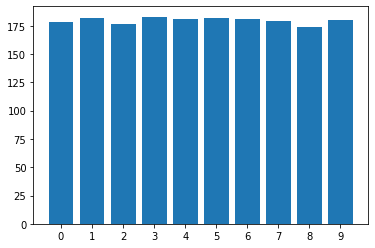

In [11]:
print(f"총 데이터 개수 : {len(x_data)}")

label_counts = []
for i, name in enumerate(digits.target_names):
    label_counts.append(np.count_nonzero(y_data == i))
    print(f"{name}의 개수 : {label_counts[i]}")
    
plt.xticks(np.arange(0, 10, step=1))
plt.bar(digits.target_names, label_counts)

총 이미지의 개수는 1797개이고, 각 숫자는 대략 180개로 균등하게 분포되어 있다.

### 데이터 Describe 해 보기

In [12]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

구글 번역으로 읽어본 개인적인 의견으로는  
인스턴스가 5620개 라는데, 왜 데이터 셋에는 1797개 밖에 없는 건지 모르겠다.

거기에 계속 이상하다고 느끼는 건데 0 ~ 16 범위의 정수형 값이라는데,  
만약 한 픽셀이 4비트라고 쳐도 범위는 0 ~ 15 까지이지 않나?  
예상으로는 8비트 256범위를 16으로 나누면서 저런 범위가 생기지 않나나 싶다.

## train, Test 데이터 분리

학습 데이터와 테스트 데이터로 분리한다.  
전체 데이터의 20%를 테스트 데이터로 분리한다.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.2, 
                                                    random_state=666)

In [14]:
x_train.shape

(1437, 64)

In [15]:
x_test.shape

(360, 64)

## 다양한 모델로 학습시켜 보기

### Decision Tree 사용해 보기

In [16]:
model_decision_tree = DecisionTreeClassifier(random_state=1)
model_decision_tree.fit(x_train, y_train)
y_predict = model_decision_tree.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.83      0.80      0.81        30
           2       0.90      0.77      0.83        35
           3       0.80      0.82      0.81        44
           4       0.84      0.86      0.85        42
           5       0.93      0.93      0.93        30
           6       1.00      0.83      0.91        30
           7       0.79      0.92      0.85        36
           8       0.76      0.79      0.77        39
           9       0.84      0.86      0.85        36

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.86       360
weighted avg       0.86      0.85      0.85       360



전체 정확도는 0.85

대체적으로 숫자 '0'의 경우는 정밀도와 재현율이 모두 높다. 즉 잘 맞춘다.  
그에 반해 숫자 '8'의 경우는 가장 낮은 f1-score를 가지고 있다. 즉, 잘 못 맞춘다.  

특이하게도 숫자 '6'의 경우는 1.0의 정밀도를 가지지만, 그다지 높지 않은 재현율을 가진다.  
즉, 다른 '6'을 다른 숫자로 착각하는 경우는 있어도, 다른 숫자를 '6'으로 착각하지는 않는다는 뜻이다.

### Random Forest 사용해 보기

In [17]:
model_random_forest = RandomForestClassifier(random_state=2)
model_random_forest.fit(x_train, y_train)
y_predict = model_random_forest.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00        35
           3       0.98      0.91      0.94        44
           4       1.00      1.00      1.00        42
           5       0.91      0.97      0.94        30
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        36
           8       0.93      0.97      0.95        39
           9       0.92      0.94      0.93        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



전체 정확도 0.97

역시 의사결정트리보다는 높게 나왔다.  

숫자 '9'가 f1-score가 가장 적게 나왔다. 손글씨 9는 헷갈리는 경우가 많다.

숫자 '3'과 '5'는 똑같은 f1-score가 나왔지만, 정 반대의 정밀도와 재현율이 나왔다.  
'3'은 다른 숫자로 착각하기 쉽지만, 다른 숫자가 '3'이라고 착각되기는 어렵다.  
'5'은 다른 숫자로 착각하기 어렵지만, 다른 숫자가 '5'이라고 착각되기는 쉽다.

### SVM 사용해 보기

In [18]:
model_svm = svm.SVC(random_state=4)
model_svm.fit(x_train, y_train)
y_predict = model_svm.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        35
           3       1.00      0.93      0.96        44
           4       1.00      0.98      0.99        42
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        30
           7       0.97      1.00      0.99        36
           8       0.95      1.00      0.97        39
           9       0.95      0.97      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



전체 정확도 0.98로 가장 높은 수치가 나왔다.

svm에서도 숫자 '9'가 f1-score가 가장 낮았다.  
숫자 '3' 역시 재현율이 낮았다.  

숫자 '8', '9'가 가장 낮은 정밀도를 보였다.  

### SGD Classifier 사용해 보기

In [19]:
model_sgd = SGDClassifier(random_state=8)
model_sgd.fit(x_train, y_train)
y_predict = model_sgd.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.97      0.98        30
           2       1.00      0.97      0.99        35
           3       0.87      0.93      0.90        44
           4       1.00      0.98      0.99        42
           5       0.86      1.00      0.92        30
           6       0.97      0.97      0.97        30
           7       0.97      1.00      0.99        36
           8       0.94      0.85      0.89        39
           9       0.97      0.94      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



전체 정확도 0.96

앞의 모델들과는 다르게 숫자 '3'의 정밀도가 많이 떨어졌다.
그리고 숫자 '8'의 재현율도 다른 모델과 달리 가장 낮았다.

학습을 한번에 전체 데이터가 아닌 일부 데이터로 하다보니  
숫자들에 대한 판단 구성이 다른 모델들과 다르게 나온 걸로 보인다.

확실히 sgd가 빠르게 학습하고, local minima에 빠질 확률은 줄지만,
학습해가는 방향이 일반적인 모델들과는 다른 것 같다.

### Logistic Regression 사용해 보기

In [20]:
model_logistic = LogisticRegression(max_iter=3000, random_state=16)
model_logistic.fit(x_train, y_train)
y_predict = model_logistic.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.97      0.98        30
           2       0.97      1.00      0.99        35
           3       0.98      0.93      0.95        44
           4       0.98      1.00      0.99        42
           5       0.91      0.97      0.94        30
           6       1.00      0.97      0.98        30
           7       0.97      1.00      0.99        36
           8       0.95      0.95      0.95        39
           9       0.97      0.94      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



전체 정확도 0.97

정밀도는 숫자 '5'가, 재현율은 숫자 '3'이 가장 낮았다.  
f1-score은 숫자 '5'이 가장 낮고, 그 다음으로 숫자 '8'이 낮았다.

## 모델을 평가해 보기

손글씨 데이터를 5가지 모델로 학습시켜 보았다.

라벨의 개수들이 균등한 데이터 셋이였고, SGD를 제외하면 전체적으로 비슷한 결과들이 나왔다.  
손글씨인 만큼 결국 가장 중요한 건 f-score와 accuracy인 것 같다.

SVM이 가장 높은 정확도를 보여주었다.  
손글씨라고 하지만 결과적으로 숫자들을 구분할 수 있는 경계가 존재하기 때문인 것 같다.

그리고 공통적으로 숫자 '3'은 정밀도는 괜찮지만, 재현율이 가장 떨어졌다.  
즉, 숫자 '3'은 다른 숫자로 착각하지는 않지만, 다른 숫자가 '3'이라고 착각하기는 쉽다는 것이다.

그와는 반대로 숫자 '5'는 괜찮은 재현율에 평균 정밀도가 가장 낮았다.
숫자 '3'는 반대로 해석된다.

그리고 전체적으로 숫자 '8', '9'가 틀리기 쉬운 숫자인 것 같다.